In [29]:
import os
#import path
import numpy as np
import tensorflow as tf

In [30]:
from tensorflow.python import pywrap_tensorflow

In [149]:
checkpoint_path='./checkpoint/model8.ckpt'
reader=pywrap_tensorflow.NewCheckpointReader(checkpoint_path)
var_to_shape_map=reader.get_variable_to_shape_map()


In [150]:
data_print=np.array([])
for key in var_to_shape_map:
    print('tensor_name',key)
    ckpt_data=np.array(reader.get_tensor(key))#cast list to np arrary
    ckpt_data=ckpt_data.flatten()#flatten list
    data_print=np.append(data_print,ckpt_data,axis=0)
 
 
print(data_print,data_print.shape,np.max(data_print),np.min(data_print),np.mean(data_print))

tensor_name generator/conv2d_transpose_1/kernel/Adam
tensor_name generator/batch_normalization_1/gamma/Adam
tensor_name generator/batch_normalization_1/beta/Adam_1
tensor_name generator/conv2d_transpose/bias
tensor_name discriminator/conv3/bias
tensor_name beta2_power
tensor_name generator/conv2d_transpose_1/bias/Adam_1
tensor_name discriminator/conv3/kernel/Adam
tensor_name discriminator/fc1/kernel
tensor_name discriminator/conv2/kernel/Adam_1
tensor_name generator/conv2d_transpose_2/kernel/Adam
tensor_name generator/conv2d_transpose_1/kernel
tensor_name discriminator/conv1/bias/Adam
tensor_name discriminator/conv3/bias/Adam_1
tensor_name discriminator/fc1/bias
tensor_name generator/batch_normalization_1/moving_mean
tensor_name generator/conv2d_transpose/kernel/Adam
tensor_name discriminator/conv1/kernel
tensor_name discriminator/conv1/bias
tensor_name generator/batch_normalization/gamma
tensor_name Variable
tensor_name discriminator/fc1/bias/Adam
tensor_name generator/batch_normaliza

In [151]:
discrmnator={}
discrmnator_layer = ['conv1','conv2','conv3','fc1','fc2']
add_info = ['kernel','bias']


In [152]:
discrmnator={'conv1':[[],[]],'conv2':[[],[]],'conv3':[[],[]],'fc1':[[],[]],'fc2':[[],[]]}


In [153]:
for key in var_to_shape_map:
    #print ("tensor_name",key)

    str_name = key
    # 因为模型使用Adam算法优化的，在生成的ckpt中，有Adam后缀的tensor
    if str_name.find('beta') > -1:
        continue
    if str_name.find('batch') > -1:
        continue
    if str_name.find('Adam') > -1:
        continue
    if str_name.find('generator') > -1:
        continue
    if str_name.find('Variable') > -1:
        continue
    print('tensor_name:' , str_name)

    if str_name.find('/') > -1:
        names = str_name.split('/')
        # first layer name and weight, bias
        layer_name = names[1]
        layer_add_info = names[2]
    else:
        layer_name = str_name
        layer_add_info = None

    if layer_add_info == 'kernel':
        discrmnator[layer_name][0]=reader.get_tensor(key)
    elif layer_add_info == 'bias':
        discrmnator[layer_name][1] = reader.get_tensor(key)
    else:
        discrmnator[layer_name] = reader.get_tensor(key)

np.save('discrmnator_pointing_new1.npy',discrmnator)
print('save npy over...')

tensor_name: discriminator/conv3/bias
tensor_name: discriminator/fc1/kernel
tensor_name: discriminator/fc1/bias
tensor_name: discriminator/conv1/kernel
tensor_name: discriminator/conv1/bias
tensor_name: discriminator/conv2/bias
tensor_name: discriminator/conv3/kernel
tensor_name: discriminator/conv2/kernel
tensor_name: discriminator/fc2/kernel
tensor_name: discriminator/fc2/bias
save npy over...


In [154]:
gan_data = np.load('discrmnator_pointing_new1.npy')
print(type(gan_data))
print(gan_data)

<class 'numpy.ndarray'>
{'conv1': [array([[[[ 0.01976027,  0.01296359,  0.01031719, ..., -0.00722876,
           0.00884169, -0.01659536]],

        [[-0.02986684,  0.00467492,  0.00046502, ...,  0.0171035 ,
          -0.00852252, -0.00114197]],

        [[ 0.0274444 , -0.00709199, -0.00025253, ...,  0.00806464,
          -0.00891693,  0.00071537]],

        [[ 0.01790523,  0.00036564,  0.02131813, ..., -0.00713059,
          -0.03593121,  0.03566358]],

        [[ 0.01923314,  0.01882901,  0.00358286, ...,  0.00294951,
          -0.03482982, -0.02850734]]],


       [[[-0.02031093, -0.01928241,  0.0031183 , ...,  0.0012908 ,
           0.02754755, -0.00801214]],

        [[-0.02162844,  0.03811445,  0.00213328, ..., -0.01577155,
           0.02030853, -0.01813333]],

        [[-0.02194381, -0.01241607,  0.02629803, ...,  0.0131153 ,
           0.00304317, -0.00544094]],

        [[-0.00496949,  0.01170129, -0.02980347, ..., -0.00986931,
           0.01502808,  0.00255031]],

        [

In [155]:
data_dict = gan_data.item()
print(data_dict.keys())

dict_keys(['conv1', 'conv2', 'fc2', 'conv3', 'fc1'])


In [156]:
print(len(data_dict))

5


In [157]:
conv1 = data_dict['conv1']
print(len(conv1))

2


In [158]:
w, b = conv1
print(w.shape)
print(b.shape)

(5, 5, 1, 128)
(128,)


In [159]:
conv2 = data_dict['conv2']
print(len(conv1))

2


In [160]:
w, b = conv2
print(w.shape)
print(b.shape)

(5, 5, 128, 256)
(256,)


In [161]:
conv3 = data_dict['conv3']
print(len(conv3))

2


In [162]:
w, b = conv3
print(w.shape)
print(b.shape)

(7, 7, 256, 512)
(512,)


In [163]:
fc1 = data_dict['fc1']
print(len(fc1))

2


In [164]:
w, b = fc1
print(w.shape)
print(b.shape)

(512, 1024)
(1024,)


In [165]:
fc2 = data_dict['fc2']
print(len(fc2))

2


In [166]:
w, b = fc2
print(w.shape)
print(b.shape)

(1024, 1)
(1,)


In [85]:
import os, time, itertools, imageio, pickle, random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [86]:
# leaky_relu
def lrelu(X, leak=0.2):
    f1 = 0.5 * (1 + leak)
    f2 = 0.5 * (1 - leak)
    return f1 * X + f2 * tf.abs(X)

In [87]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [88]:
print (mnist.test.labels.shape)
print (mnist.train.labels.shape)

(10000, 10)
(55000, 10)


In [89]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1),
                       name ='W')


In [90]:
def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape)
                       , name = 'b')


In [91]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], 
                        padding='SAME')


In [92]:
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')



In [93]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
    x_image = tf.reshape(x, [-1, 28, 28, 1])

    

In [94]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5,5,1,16])
    b1 = bias([16])
    Conv1=conv2d(x_image, W1)+ b1
    C1_Conv = tf.nn.relu(Conv1 )


In [95]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)


In [96]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5,5,16,36])
    b2 = bias([36])
    Conv2=conv2d(C1_Pool, W2)+ b2
    C2_Conv = tf.nn.relu(Conv2)


In [97]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv) 


In [98]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 1764])#7*7*56=1766


In [99]:
with tf.name_scope('D_Hidden_Layer'):
    W3= weight([1764, 128])
    b3= bias([128])
    D_Hidden = tf.nn.relu(
                  tf.matmul(D_Flat, W3)+b3)
    D_Hidden_Dropout= tf.nn.dropout(D_Hidden, ####若在结构上不定义keep_prob,则需要在结构中定义keep_prob = tf.placeholder(tf.float32)，###在session()中用feed_dict()喂参数进去
                                keep_prob=0.8)####在结构上直接定义参数大小，直接赋值


In [115]:
with tf.name_scope('Output_Layer'):
    W4 = weight([128,10])
    b4 = bias([10])
    y_predict= tf.nn.softmax(
                 tf.matmul(D_Hidden_Dropout,
                           W4)+b4)


In [122]:
with tf.name_scope('optimizer'):
    y_label=tf.placeholder("float",shape=[None,10],name="y_label")
    loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [123]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


In [124]:
trainEpochs = 30##30个周期，每个周期对训练的样本55000样本进行训练
batchSize = 100#批尺寸100
totalBatchs = int(mnist.train.num_examples/batchSize)##55000/100=550
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
for epoch in range(trainEpochs):
 
    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})
 
    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         


Train Epoch: 01 Loss= 1.602504253  Accuracy= 0.8836
Train Epoch: 02 Loss= 1.545179009  Accuracy= 0.9284
Train Epoch: 03 Loss= 1.525078177  Accuracy= 0.9454
Train Epoch: 04 Loss= 1.511979699  Accuracy= 0.9548
Train Epoch: 05 Loss= 1.504486918  Accuracy= 0.9624
Train Epoch: 06 Loss= 1.500643253  Accuracy= 0.9654
Train Epoch: 07 Loss= 1.495053887  Accuracy= 0.9718
Train Epoch: 08 Loss= 1.493774056  Accuracy= 0.9704
Train Epoch: 09 Loss= 1.488649845  Accuracy= 0.9752
Train Epoch: 10 Loss= 1.486672163  Accuracy= 0.9788
Train Epoch: 11 Loss= 1.486190557  Accuracy= 0.9776
Train Epoch: 12 Loss= 1.484775782  Accuracy= 0.9802
Train Epoch: 13 Loss= 1.484281301  Accuracy= 0.9798
Train Epoch: 14 Loss= 1.482247353  Accuracy= 0.9808
Train Epoch: 15 Loss= 1.482653499  Accuracy= 0.9808
Train Epoch: 16 Loss= 1.480198026  Accuracy= 0.9834
Train Epoch: 17 Loss= 1.479329586  Accuracy= 0.9828
Train Epoch: 18 Loss= 1.480052948  Accuracy= 0.9826
Train Epoch: 19 Loss= 1.480060697  Accuracy= 0.983
Train Epoch: 

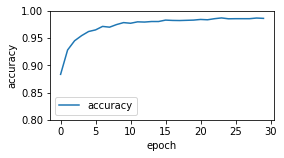

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()


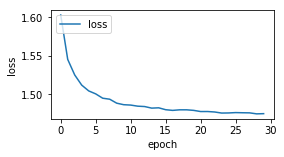

In [126]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')


In [167]:
def get_conv_filter(name):
        return tf.constant(data_dict[name][0], name='conv')

In [168]:
def get_fc_weight(name):
        return tf.constant(data_dict[name][0], name='fc')

In [169]:
def get_bias(name):
        return tf.constant(data_dict[name][1], name='bias')

In [170]:
W1 = get_conv_filter('conv1')

In [171]:
b1 = get_bias('conv1')
x = tf.placeholder("float",shape=[None, 784]
                       ,name="x")    
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [173]:
#out1 = tf.layers.conv2d(x_image,128,[5,5],strides=(2,2),padding='same',kernel_initializer=W1,bias_initializer=b1)
h = tf.nn.conv2d(x_image,W1,[1,2,2,1],padding='SAME')

In [180]:
h = tf.nn.bias_add(h, b1)

In [181]:
h = tf.nn.relu(h)

In [182]:
W2 = get_conv_filter('conv2')
b2 = get_bias('conv2')

In [183]:
h2 = tf.nn.conv2d(h,W2,[1,2,2,1],padding='SAME')

In [184]:
h2 = tf.nn.bias_add(h2, b2)
h2 = tf.layers.batch_normalization(h2)

In [185]:
h2 = tf.nn.relu(h2)

In [204]:
W3 = get_conv_filter('conv3')
b3 = get_bias('conv3')

In [205]:
h3 = tf.nn.conv2d(h2,W3,[1,1,1,1],padding='VALID')

In [206]:
#conv3 = tf.layers.conv2d(lrelu2, 512, [7, 7], strides=(1, 1), padding='valid', kernel_initializer=w_init, name='conv3')
       # print(conv3.shape)
        #fc1 = tf.reshape(conv3, [-1, 512])
       # fc1 = tf.layers.dense(inputs=fc1, units=1024, name='fc1')
      #  fc2 = tf.layers.dense(inputs=fc1, units=1, name='fc2')
      #  fc2_tmp = tf.reshape(fc2, [batch_size, 1, 1, 1])
       # o = tf.nn.sigmoid(fc2)
h3 = tf.nn.bias_add(h3, b3)
fc1_w = get_fc_weight('fc1')
fc1 = tf.reshape(h3, [-1, 512])
print(fc1_w.shape)
print(h3.shape)

(512, 1024)
(?, 1, 1, 512)


In [207]:
fc1_w = get_fc_weight('fc1')
fc1_b = get_bias('fc1')
fc1 = tf.matmul(fc1, fc1_w)
fc1 = tf.nn.bias_add(fc1, fc1_b)
print(fc1.shape)

(?, 1024)


In [208]:
#fc2_w = get_fc_weight('fc2')
#fc2_b = get_bias('fc2')
#fc2 = tf.matmul(fc1, fc2_w)
#fc2 = tf.nn.bias_add(fc2, fc2_b)
fc2 = tf.layers.dense(inputs=fc1, units=10, name='fc2')
print(fc2.shape)

(?, 10)


In [209]:
#print(fc2.shape)
y_predict= tf.nn.softmax(fc2)

In [210]:
with tf.name_scope('optimizer'):
    y_label=tf.placeholder("float",shape=[None,10],name="y_label")
    loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))
    optimizer=tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

In [211]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1),
                                  tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [212]:
trainEpochs = 30##30个周期，每个周期对训练的样本55000样本进行训练
batchSize = 100#批尺寸100
totalBatchs = int(mnist.train.num_examples/batchSize)##55000/100=550
epoch_list=[];accuracy_list=[];loss_list=[];
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())
 
for epoch in range(trainEpochs):
 
    
    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,
                                      y_label: batch_y})
        
    
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: mnist.validation.images, 
                                   y_label: mnist.validation.labels})
 
    epoch_list.append(epoch)
    loss_list.append(loss);accuracy_list.append(acc)    
    
    print("Train Epoch:", '%02d' % (epoch+1), \
          "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)         


Train Epoch: 01 Loss= 2.262591839  Accuracy= 0.1698
Train Epoch: 02 Loss= 2.188165188  Accuracy= 0.3626
Train Epoch: 03 Loss= 2.114970207  Accuracy= 0.5282
Train Epoch: 04 Loss= 2.050529003  Accuracy= 0.6032
Train Epoch: 05 Loss= 1.998929143  Accuracy= 0.629
Train Epoch: 06 Loss= 1.958723664  Accuracy= 0.6408
Train Epoch: 07 Loss= 1.929165602  Accuracy= 0.65
Train Epoch: 08 Loss= 1.906086564  Accuracy= 0.6518
Train Epoch: 09 Loss= 1.887968898  Accuracy= 0.6554
Train Epoch: 10 Loss= 1.873527765  Accuracy= 0.6584
Train Epoch: 11 Loss= 1.849061370  Accuracy= 0.7022
Train Epoch: 12 Loss= 1.829464078  Accuracy= 0.7204
Train Epoch: 13 Loss= 1.814204454  Accuracy= 0.7236
Train Epoch: 14 Loss= 1.801870704  Accuracy= 0.7298
Train Epoch: 15 Loss= 1.791635513  Accuracy= 0.7328
Train Epoch: 16 Loss= 1.782872438  Accuracy= 0.7342
Train Epoch: 17 Loss= 1.775555134  Accuracy= 0.7392
Train Epoch: 18 Loss= 1.768859148  Accuracy= 0.7408
Train Epoch: 19 Loss= 1.763345480  Accuracy= 0.7442
Train Epoch: 20

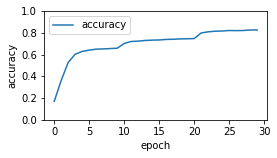

In [214]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
